In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


#### Load and get data

In [2]:
# url = "https://object.files.data.gouv.fr/meteofrance-drias/SocleM-Climat-2025/CPRCM/METROPOLE/ALPX-3/CNRM-ESM2-1/r1i1p1f2/CNRM-AROME46t1/ssp370/day/tasAdjust/version-hackathon-102025/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc"

# file_path = r"../Data/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc"

# ds = xr.open_dataset(file_path)

# print(ds)


file_path = "../Data/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc"

ds = xr.open_dataset(file_path, chunks={"time": 100})


#### turn into data array

In [3]:
print(ds.data_vars)

Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB dask.array<chunksize=(134, 143, 4), meta=np.ndarray>
    lat_bnds        (y, x, nbounds) float64 613kB dask.array<chunksize=(134, 143, 4), meta=np.ndarray>
    LambertParisII  int32 4B ...
    tasAdjust       (time, y, x) float32 2GB dask.array<chunksize=(100, 134, 143), meta=np.ndarray>
    time_bnds       (time, bnds) datetime64[ns] 503kB dask.array<chunksize=(100, 2), meta=np.ndarray>


In [4]:
da = ds["tasAdjust"]

In [5]:
print(da)
print(type(da))


<xarray.DataArray 'tasAdjust' (time: 31411, y: 134, x: 143)> Size: 2GB
dask.array<open_dataset-tasAdjust, shape=(31411, 134, 143), dtype=float32, chunksize=(100, 134, 143), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 251kB 2015-01-01T12:00:00 ... 2100-12-31T1...
  * y        (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x        (x) float64 1kB 6e+04 6.8e+04 7.6e+04 ... 1.188e+06 1.196e+06
    lon      (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
    lat      (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
Attributes:
    standard_name:          air_temperature
    long_name:              Bias Corrected Near-Surface Air Temperature
    units:                  K
    grid_mapping:           LambertParisII
    cell_methods:           time: mean
    coverage_content_type:  derivedData
    units_metadata:         temperature: on_scale
<class 'xarray.core.dataarray.DataArray'>


In [6]:
print(da.shape)
print(da.dims)



(31411, 134, 143)
('time', 'y', 'x')


In [7]:
da_valid = da.where(~np.isnan(da).all(dim="time"), drop=True)

KeyError: 'Indexing with a boolean dask array is not allowed. This will result in a dask array of unknown shape. Such arrays are unsupported by Xarray.Please compute the indexer first using .compute()'

#### Getting all time series for one lat lon

In [ ]:
lat_target = 45.5
lon_target = 6.2

In [ ]:
point_ts = da.sel(lat=lat_target, lon=lon_target, method="nearest")

KeyError: "no index found for coordinate 'lat'"

In [8]:
da_first = da.isel(time=0).compute()

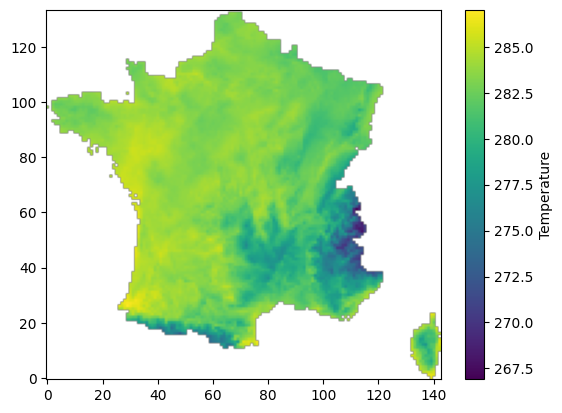

In [9]:
plt.imshow(da_first, origin='lower')
plt.colorbar(label='Temperature')
plt.show()

In [10]:
da_rand = da.isel(time=1234).compute()


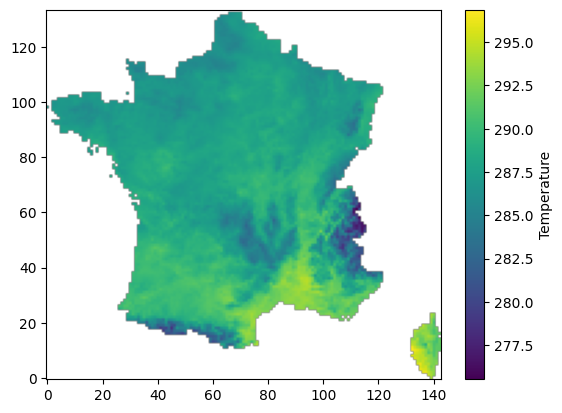

In [11]:
plt.imshow(da_rand, origin='lower')
plt.colorbar(label='Temperature', cmap='jet')
plt.show()

In [12]:
y_idx = 60  # replace with your chosen y index
x_idx = 80  # replace with your chosen x index
# point_ts is a DataArray of shape (time,)
point_ts = da[:, y_idx, x_idx].compute()  # compute loads only this 1D array


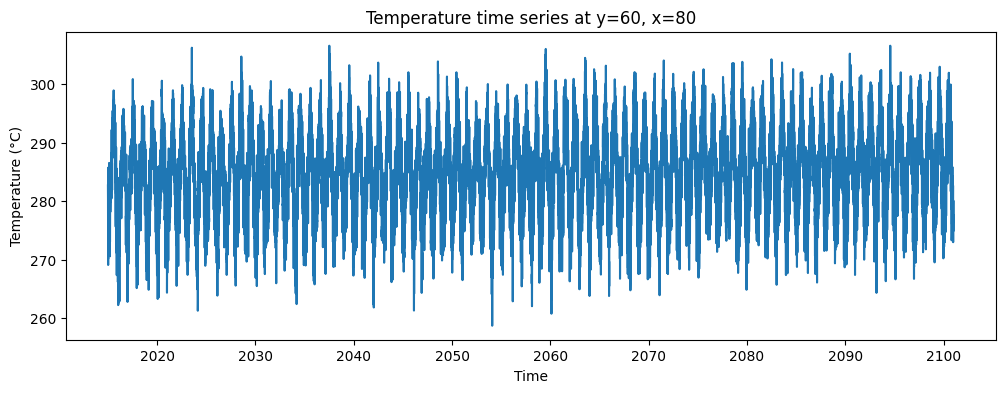

In [13]:
plt.figure(figsize=(12,4))
plt.plot(point_ts.time, point_ts.values)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature time series at y={y_idx}, x={x_idx}")
plt.show()

In [14]:
lats = ds["lat"].values   # 2D array of latitudes
lons = ds["lon"].values   # 2D array of longitudes

print(lats.shape, lons.shape)  # should match (y, x)
print(lats, lons)              # shows all values


(134, 143) (134, 143)
[[41.361 41.367 41.373 ... 41.331 41.325 41.318]
 [41.433 41.439 41.444 ... 41.402 41.396 41.39 ]
 [41.504 41.51  41.516 ... 41.474 41.468 41.461]
 ...
 [50.742 50.749 50.756 ... 50.706 50.699 50.691]
 [50.814 50.821 50.827 ... 50.778 50.77  50.762]
 [50.885 50.892 50.899 ... 50.849 50.841 50.834]] [[-4.09690905 -4.00201368 -3.90709972 ...  9.24429703  9.33907509
   9.43383408]
 [-4.10470295 -4.00969362 -3.91466594 ...  9.25265789  9.34755039
   9.44242191]
 [-4.11251593 -4.01739264 -3.92225051 ...  9.26103973  9.35604572
   9.45103168]
 ...
 [-5.30820227 -5.19564533 -5.0830574  ... 10.54347706 10.65583897
  10.7681675 ]
 [-5.31920004 -5.20648289 -5.09373474 ... 10.5552702  10.66779137
  10.78027821]
 [-5.33022928 -5.21735191 -5.10444307 ... 10.56709671 10.67977715
  10.7924242 ]]


In [15]:
print("Latitude:", lats[y_idx, x_idx])
print("Longitude:", lons[y_idx, x_idx])


Latitude: 45.866
Longitude: 3.62440896034241


#### temp a paris

In [16]:
# Target coordinates Paris
lat_target = 48.8566
lon_target = 2.3522

# Compute distance squared to every grid cell
dist2 = (ds["lat"].values - lat_target)**2 + (ds["lon"].values - lon_target)**2

# Find indices of the minimum distance
y_idx, x_idx = np.unravel_index(np.argmin(dist2), dist2.shape)

print("Nearest grid cell:", y_idx, x_idx)
print("Latitude, Longitude:", ds["lat"].values[y_idx, x_idx], ds["lon"].values[y_idx, x_idx])

Nearest grid cell: 101 68
Latitude, Longitude: 48.823 2.39095163345337


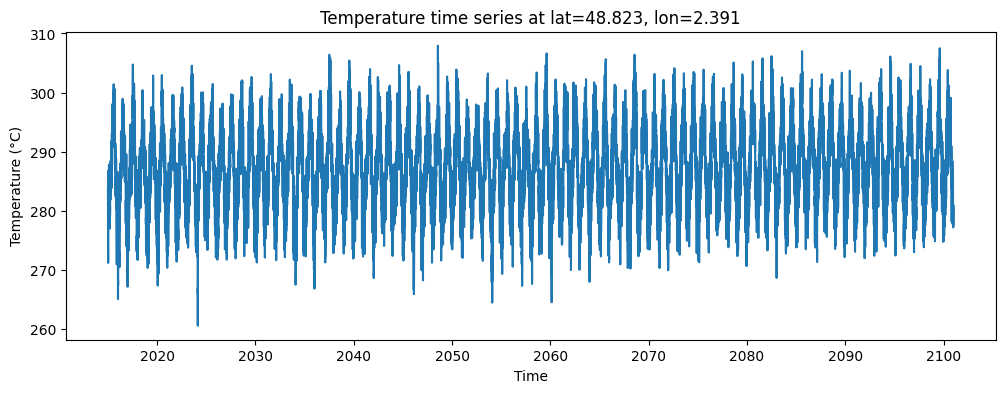

In [17]:
# Extract time series for that grid cell
point_ts = da[:, y_idx, x_idx].compute()

# Plot
plt.figure(figsize=(12,4))
plt.plot(point_ts.time, point_ts.values)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature time series at lat={ds['lat'].values[y_idx, x_idx]:.3f}, lon={ds['lon'].values[y_idx, x_idx]:.3f}")
plt.show()
